In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset (Example dataset of customer reviews)
data = {
    'Review': [
        "The product is great! Works like a charm.",
        "Terrible experience, I want my money back.",
        "Absolutely loved it, will buy again!",
        "Not worth the money.",
        "Amazing quality and fast shipping!",
        "Horrible, stopped working after a week.",
        "Very satisfied, highly recommend.",
        "Disappointed with the service.",
        "Excellent product and great customer support!",
        "It's okay, not the best but not the worst either."
    ],
    'Sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Positive, 0 = Negative
}

In [ ]:
# Convert dataset to DataFrame
df = pd.DataFrame(data)


In [ ]:
# Preprocessing: Train-test split
X = df['Review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predictions
y_pred = log_reg.predict(X_test_tfidf)

In [ ]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.67

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



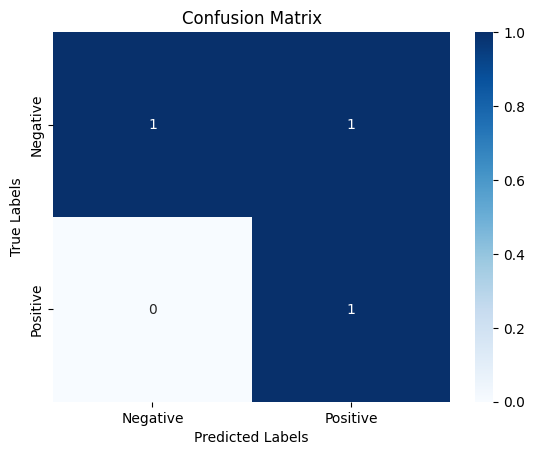

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Display top positive and negative features
def show_top_features(vectorizer, model, n=10):
    feature_names = vectorizer.get_feature_names_out()
    coefs = model.coef_[0]
    top_positive = np.argsort(coefs)[-n:]
    top_negative = np.argsort(coefs)[:n]
    print("Top Positive Words:") # Indented this line to be inside the function
    for i in top_positive:
        print(f"{feature_names[i]}: {coefs[i]:.4f}")

    print("\nTop Negative Words:") # Indented this line to be inside the function
    for i in top_negative:
        print(f"{feature_names[i]}: {coefs[i]:.4f}")

show_top_features(tfidf_vectorizer, log_reg)

Top Positive Words:
fast: 0.1724
shipping: 0.1724
quality: 0.1724
amazing: 0.1724
recommend: 0.1990
buy: 0.1990
loved: 0.1990
highly: 0.1990
satisfied: 0.1990
absolutely: 0.1990

Top Negative Words:
money: -0.3250
worth: -0.3250
best: -0.2653
worst: -0.2653
okay: -0.2653
horrible: -0.2298
working: -0.2298
week: -0.2298
stopped: -0.2298
great: 0.1542


In [ ]:
 # Visualization of top words
feature_names = tfidf_vectorizer.get_feature_names_out()
coefs = log_reg.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
}).sort_values(by='Coefficient', ascending=False)

<ipython-input-14-b88aa63387e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10), palette='viridis')


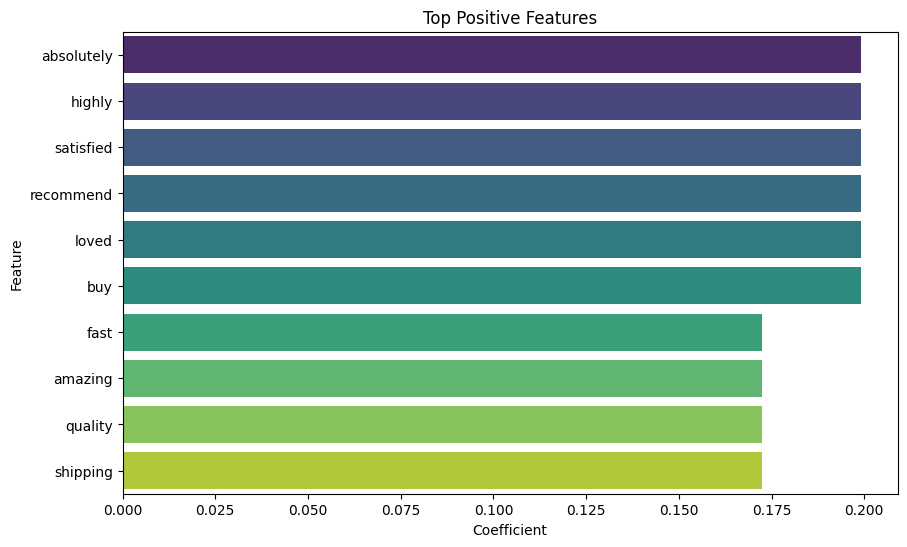

<ipython-input-14-b88aa63387e9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance.tail(10), palette='magma')


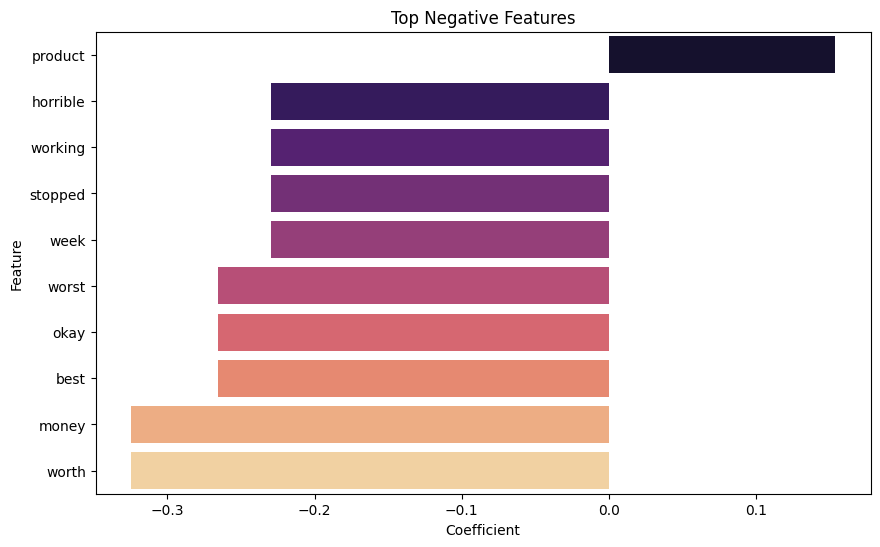

In [ ]:
# Plot top positive and negative features
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top Positive Features')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.tail(10), palette='magma')
plt.title('Top Negative Features')
plt.show()
